<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Pytorch/blob/main/PyTorch%20Workflow/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**

Data can be anything

* Excel Spreadsheet
* Images of anykind
* Video (Youtube has lots of data)
* Audio like podcast or songs
* DNA
* Text etc...

Machine learning has two primary parts

1. Get the data in numerical representations
2. Build a model to learn patterns in that numerical representation

## **Demo with Linear Regression**

In [1]:
import torch
from torch import nn ## nn contains all the bulding blocks for neural network
import matplotlib.pyplot as plt

In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

## **Splitting Data in Training and Test Sets**

In [4]:
# Create a train and test split
train_split = int(0.8 * len(X))
X_train, y_train = X[0:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, X_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

## **Visualize the data**

In [5]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

 """
 Plots training data, test data and compare predictions
 """
 plt.figure(figsize=(10,7))

 # Plot the training data in blue
 plt.scatter(train_data, train_labels, c="b", s=6, label="Training Data")

 # Plot the testing data in green
 plt.scatter(test_data, test_labels, c="g", s=6, label="Testing Data")

 if predictions is not None:

  plt.scatter(test_data, predictions, color="orange", s=6, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


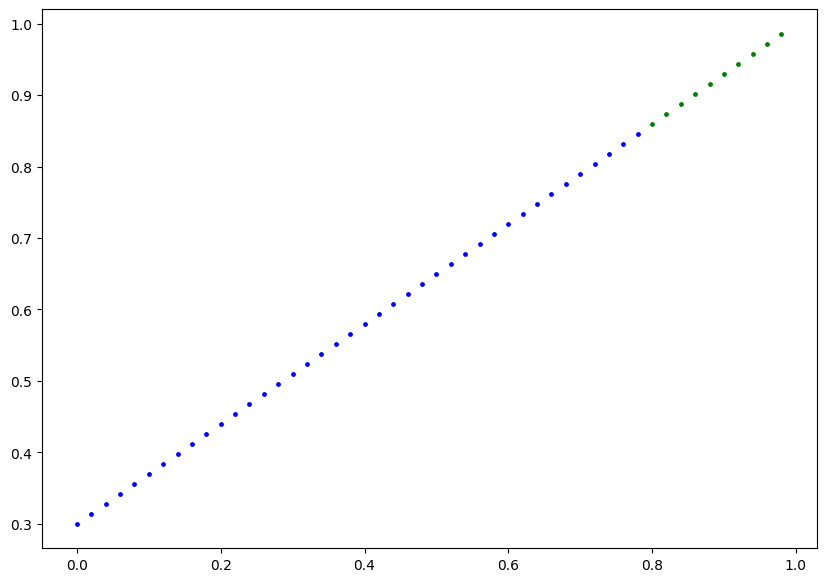

In [6]:
plot_prediction()

## **Build a Liner Regression Model**

In [7]:
# Create Linear Regression class
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(
                             1, # Starts with a random weight and try to adjust it to the ideal weight
                             requires_grad=True,
                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(
                            1, # Starts with a random bias and try to adjust it to the ideal bias
                            requires_grad=True,
                            dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

## **Checking the contents of our PyTorch model**

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the linear regression model
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## **Making Predictions using torch.inference_model()**

To check our model's predictive power, let's see how well it predicts y_test based on X_test.

When we pass data through our model, it's going to run it through forward() method

In [10]:
# Make predictions with model
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

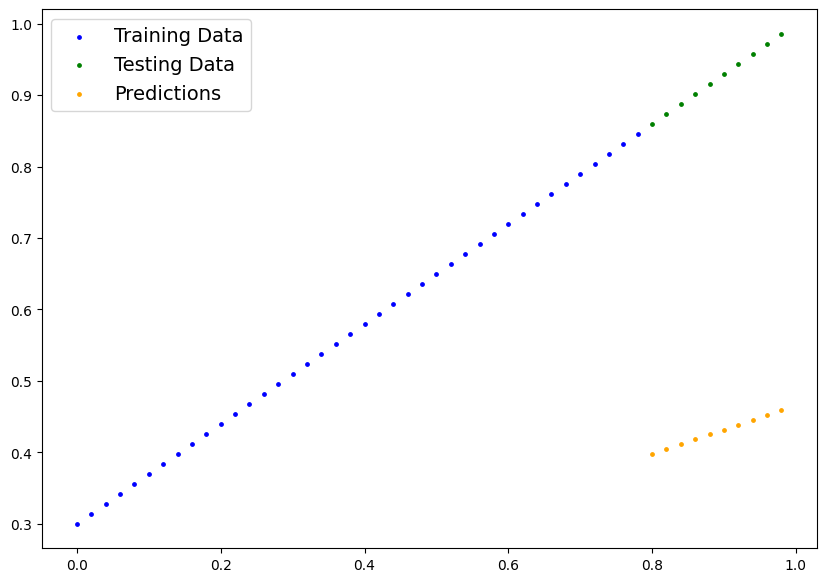

In [11]:
plot_prediction(predictions=y_pred)

## **Train Model**

The whole idea of training is for a model to move from some unknown parameters (these my be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong models predictions are is to use a loss function.

**Note** : Loss function may also be called cost function or criterion in different areas.

Things we need to train:

**Loss Function** : A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

**Optimizer** : Takes into account the loss of a model and adjust the model's parameters (weights & bias)

In [11]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Setup a optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # Learning rate